In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-cgpa/placement.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('/kaggle/input/placement-cgpa/placement.csv')

In [4]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [5]:
df.shape

(1000, 3)

In [6]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [7]:
df.sample(10)

,cgpa,placement_exam_marks,placed
309,7.46,31.0,1
276,6.96,46.0,0
54,8.42,36.0,1
988,5.64,37.0,1
519,6.60,8.0,1
15,7.10,21.0,0
951,7.52,48.0,1
992,6.26,12.0,0
69,7.41,44.0,0
187,6.63,10.0,1


In [8]:
import warnings
warnings.filterwarnings('ignore')

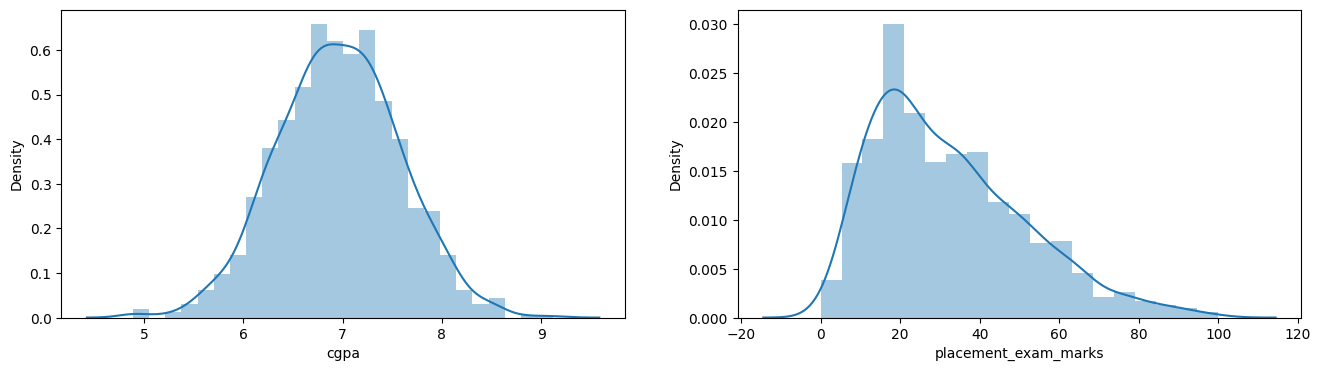

In [9]:
plt.figure(figsize= (16,4))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [10]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [11]:
print('Mean value of cgpa: ',df['cgpa'].mean())
print('std value of cgpa: ',df['cgpa'].std())
print('max value of cgpa: ',df['cgpa'].max())
print('min value of cgpa: ',df['cgpa'].min())

Mean value of cgpa:  6.96124
std value of cgpa:  0.6158978751323894
max value of cgpa:  9.12
min value of cgpa:  4.89


In [12]:
#finding the boundary values
print('Highest allowed',df['cgpa'].mean() + 3*df['cgpa'].std())
print('Lowest allowed',df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [13]:
#finding the outlier
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [14]:
#trimming
new_df= df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [15]:
# approach 2
#calculating the z-score

df['zscore_cgpa']= (df['cgpa']- df['cgpa'].mean())/df['cgpa'].std()

In [16]:
df.head()

,cgpa,placement_exam_marks,placed,zscore_cgpa
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [17]:
df[df['zscore_cgpa'] > 3]

,cgpa,placement_exam_marks,placed,zscore_cgpa
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [18]:
df[df['zscore_cgpa'] < -3]

,cgpa,placement_exam_marks,placed,zscore_cgpa
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [19]:
df[(df['zscore_cgpa'] > 3) | (df['zscore_cgpa'] < -3)]

,cgpa,placement_exam_marks,placed,zscore_cgpa
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [20]:
new_df= df[(df['zscore_cgpa'] < 3) & (df['zscore_cgpa'] >-3)]
new_df

,cgpa,placement_exam_marks,placed,zscore_cgpa
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [21]:
new_df.sample(5)

,cgpa,placement_exam_marks,placed,zscore_cgpa
525,6.33,17.0,0,-1.024910
787,7.02,9.0,0,0.095405
812,5.99,23.0,0,-1.576950
75,6.77,56.0,1,-0.310506
172,7.24,43.0,1,0.452608


In [22]:
#capping

upper_limit= df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit= df['cgpa'].mean() - 3*df['cgpa'].std()

In [23]:
upper_limit, lower_limit

(8.808933625397168, 5.113546374602832)

In [24]:
df['cgpa']= np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [25]:
df

,cgpa,placement_exam_marks,placed,zscore_cgpa
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


In [26]:
df.shape

(1000, 4)

In [27]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64